In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
import os

from scipy import stats
from scipy.stats import shapiro

import seaborn as sns
is_ipython = 'inline' in matplotlib.get_backend()

In [2]:
path = "./Stats_2/" 
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, header = None) for f in all_files),axis=1)

df = df.T
df = df.rename(columns={0: "Resolution", 1: "Environment Type", 2: "Light Intensity", 3: "Box Bumps", 4: "Wall Bumps", 5: "Loops", 6: "Steps", 7: "Reward", 8: "Threshold"})
df = df.sort_values(["Resolution", "Environment Type", "Light Intensity"], ascending=True)
df = df.replace({"Environment Type": 0}, 'simple')
df = df.replace({"Environment Type": 1}, 'complex')

df = df.reset_index(drop = True)



df_28 = df.drop(df[df.Resolution == 42.0].index)
df_28 = df_28.reset_index(drop = True)

df_42 = df.drop(df[df.Resolution == 28.0].index)

df.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold
0,28.0,simple,0.5,9.6,0.6,1.0,651.8,5186.6,0.344831
1,28.0,simple,0.5,10.4,1.2,0.2,658.6,5166.6,0.386866
2,28.0,simple,0.5,19.2,6.4,4.6,737.4,4717.6,0.505771
3,28.0,simple,1.0,6.0,0.0,0.2,644.6,5323.4,0.560073
4,28.0,simple,1.0,6.6,0.0,0.6,668.6,5281.4,0.649123
5,28.0,simple,1.0,7.6,0.4,0.2,643.8,5269.0,0.627682
6,28.0,simple,1.5,7.0,0.0,0.2,642.2,5295.8,0.544931
7,28.0,simple,1.5,1.8,0.4,0.0,643.0,5447.4,0.621937
8,28.0,simple,1.5,4.4,0.0,0.0,645.4,5370.6,0.548395
9,28.0,complex,0.5,24.8,6.4,3.2,686.8,4481.4,0.472242


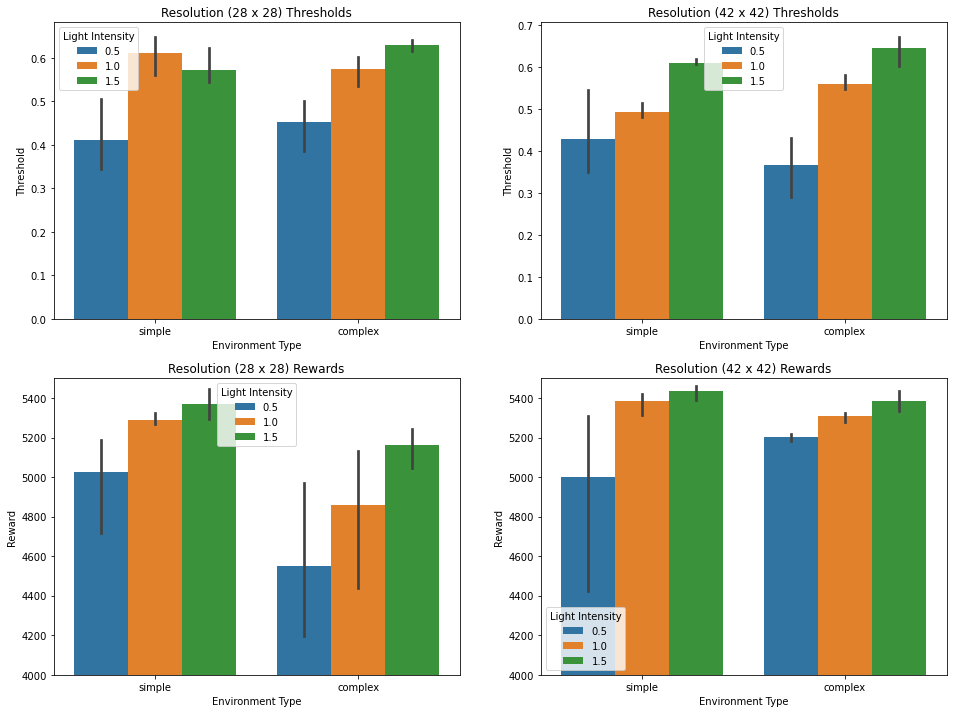

In [3]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(title = "Resolution (28 x 28) Thresholds")
sns.barplot(x="Environment Type",y="Threshold",hue="Light Intensity", data=df_28, ax=axs[0][0])
axs[0][1].set(title = "Resolution (42 x 42) Thresholds")
sns.barplot(x="Environment Type",y="Threshold",hue="Light Intensity", data=df_42, ax=axs[0][1])
axs[1][0].set(ylim=(4000,5500), title="Resolution (28 x 28) Rewards")
sns.barplot(x="Environment Type",y="Reward",hue="Light Intensity", data=df_28, ax=axs[1][0])
axs[1][1].set(ylim=(4000,5500), title="Resolution (42 x 42) Rewards")
sns.barplot(x="Environment Type",y="Reward",hue="Light Intensity", data=df_42, ax=axs[1][1])

plt.show()

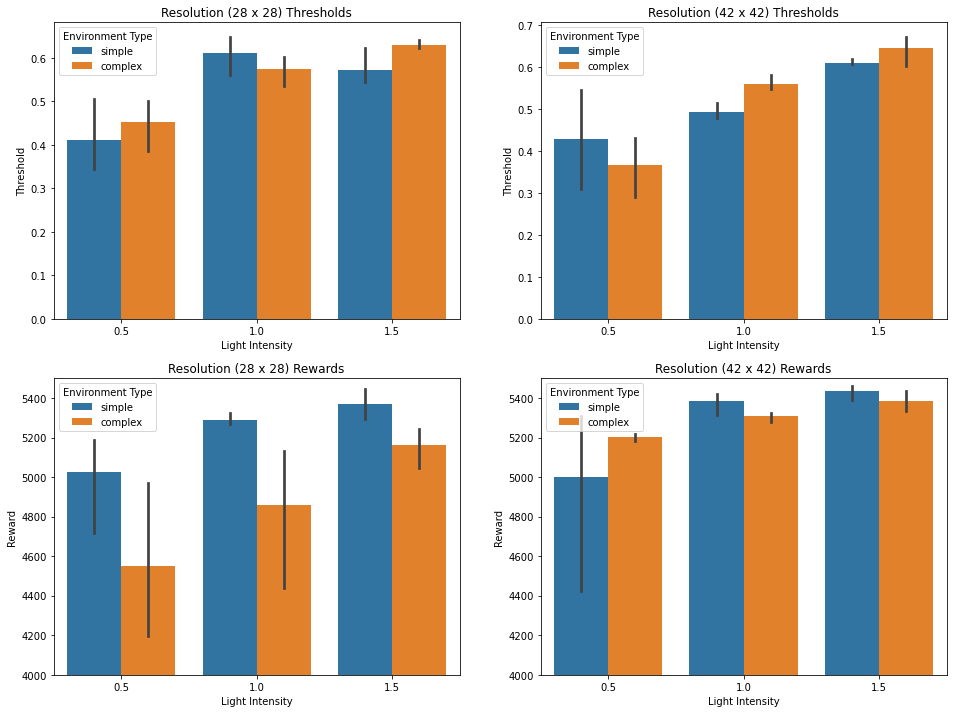

In [4]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(title = "Resolution (28 x 28) Thresholds")
sns.barplot(x="Light Intensity",y="Threshold",hue="Environment Type", data=df_28, ax=axs[0][0])
axs[0][1].set(title = "Resolution (42 x 42) Thresholds")
sns.barplot(x="Light Intensity",y="Threshold",hue="Environment Type", data=df_42, ax=axs[0][1])
axs[1][0].set(ylim=(4000,5500), title="Resolution (28 x 28) Rewards")
sns.barplot(x="Light Intensity",y="Reward",hue="Environment Type", data=df_28, ax=axs[1][0])
axs[1][1].set(ylim=(4000,5500), title="Resolution (42 x 42) Rewards")
sns.barplot(x="Light Intensity",y="Reward",hue="Environment Type", data=df_42, ax=axs[1][1])

plt.show()

In [5]:


test_dataset = [0.344831, 0.386866, 0.505771]
stat, p = shapiro(test_dataset)
print(p)
print(stat)
print(df.Threshold)

0.4861074388027191
0.9293301701545715
0     0.344831
1     0.386866
2     0.505771
3     0.560073
4     0.649123
5     0.627682
6     0.544931
7     0.621937
8     0.548395
9     0.472242
10    0.500874
11    0.385597
12    0.582920
13    0.535758
14    0.602779
15    0.634043
16    0.616961
17    0.640276
18    0.431323
19    0.309842
20    0.544585
21    0.513306
22    0.485006
23    0.477475
24    0.606112
25    0.618102
26    0.607398
27    0.289673
28    0.379860
29    0.430258
30    0.546765
31    0.553896
32    0.580758
33    0.603255
34    0.659393
35    0.672434
Name: Threshold, dtype: float64


In [6]:
test = shapiro
j = 0
print("Threshold value Shapiro-Wilk test")
for i in range(0,12):
    data = [df.Threshold[j], df.Threshold[j+1], df.Threshold[j+2]]
    stat, p = test(data)
    if p > 0.05:
        normal = "  (normal)"
    else:
        normal = "  (non-normal)"
    print(str(df.Threshold[j]) + " " + str(df.Threshold[j+1]) + " " + str(df.Threshold[j+2]) + ", stat = " + str(stat) + ", p = " + str(p) + normal)
    j = j + 3 

Threshold value Shapiro-Wilk test
0.3448314666748047 0.3868658244609833 0.5057712197303772, stat = 0.9293280243873596, p = 0.4860992431640625  (normal)
0.5600728392601013 0.6491227746009827 0.6276821494102478, stat = 0.9177683591842651, p = 0.4445284307003021  (normal)
0.5449311137199402 0.6219374537467957 0.548394501209259, stat = 0.7836605310440063, p = 0.07605937868356705  (normal)
0.4722417891025543 0.500874400138855 0.385596752166748, stat = 0.9221541285514832, p = 0.45996397733688354  (normal)
0.5829203128814697 0.535757839679718 0.6027785539627075, stat = 0.9475756883621216, p = 0.558796763420105  (normal)
0.6340425610542296 0.6169606447219849 0.6402755379676819, stat = 0.9326841831207275, p = 0.49874556064605713  (normal)
0.4313226342201233 0.30984169244766235 0.544585347175598, stat = 0.9995916485786438, p = 0.9614015221595764  (normal)
0.5133062601089478 0.4850060939788818 0.47747460007667536, stat = 0.8992919921875, p = 0.38325050473213196  (normal)
0.6061118841171265 0.6181

In [7]:
j = 0
print("Reward value Shapiro-Wilk test")
for i in range(0,12):
    data = [df.Reward[j], df.Reward[j+1], df.Reward[j+2]]
    stat, p = shapiro(data)
    if p > 0.05:
        normal = "  (normal)"
    else:
        normal = "  (non-normal)"
    print(str(df.Reward[j]) + " " + str(df.Reward[j+1]) + " " + str(df.Reward[j+2]) + ", stat = " + str(stat) + ", p = " + str(p) + normal)
    j = j + 3 

Reward value Shapiro-Wilk test
5186.6 5166.6 4717.6, stat = 0.7819219827651978, p = 0.07203321158885956  (normal)
5323.4 5281.4 5269.0, stat = 0.9101777076721191, p = 0.4186722934246063  (normal)
5295.8 5447.4 5370.6, stat = 0.9999420046806335, p = 0.9854469895362854  (normal)
4481.4 4198.6 4969.0, stat = 0.9769858121871948, p = 0.7091419696807861  (normal)
4441.4 5134.6 4994.2, stat = 0.894472062587738, p = 0.36811456084251404  (normal)
5045.4 5205.4 5244.2, stat = 0.8897649645805359, p = 0.35362499952316284  (normal)
5263.0 5308.2 4426.2, stat = 0.7883296012878418, p = 0.0869307592511177  (normal)
5421.8 5414.2 5313.4, stat = 0.8023034334182739, p = 0.12000822275876999  (normal)
5392.6 5453.8 5460.2, stat = 0.8203088045120239, p = 0.1639638990163803  (normal)
5184.2 5219.4 5208.2, stat = 0.9577812552452087, p = 0.604761004447937  (normal)
5319.4 5323.8 5278.2, stat = 0.8216341733932495, p = 0.1672651469707489  (normal)
5435.8 5334.6 5378.2, stat = 0.9936614036560059, p = 0.8477831482

In [8]:
df_threshold_anova = df[["Resolution", "Environment Type", "Light Intensity", "Threshold"]]
df_threshold_anova = df_threshold_anova.rename(columns={"Environment Type": "Environment_Type", "Light Intensity": "Light_Intensity"})
df_threshold_anova.head(100)

,Resolution,Environment_Type,Light_Intensity,Threshold
0,28.0,simple,0.5,0.344831
1,28.0,simple,0.5,0.386866
2,28.0,simple,0.5,0.505771
3,28.0,simple,1.0,0.560073
4,28.0,simple,1.0,0.649123
5,28.0,simple,1.0,0.627682
6,28.0,simple,1.5,0.544931
7,28.0,simple,1.5,0.621937
8,28.0,simple,1.5,0.548395
9,28.0,complex,0.5,0.472242


In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [10]:
model = ols("Threshold ~ C(Resolution, Sum) + C(Environment_Type, Sum) + C(Light_Intensity, Sum) + C(Resolution, Sum)*C(Environment_Type, Sum)*C(Light_Intensity, Sum)", data=df_threshold_anova).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,10.102331,1.0,3287.034747,3.402042e-27
"C(Resolution, Sum)",0.005665,1.0,1.843402,1.871823e-01
"C(Environment_Type, Sum)",0.002584,1.0,0.840674,3.683262e-01
"C(Light_Intensity, Sum)",0.254390,2.0,41.385883,1.663634e-08
"C(Resolution, Sum):C(Environment_Type, Sum)",0.000096,1.0,0.031139,8.614115e-01
"C(Resolution, Sum):C(Light_Intensity, Sum)",0.013578,2.0,2.208976,1.316503e-01
"C(Environment_Type, Sum):C(Light_Intensity, Sum)",0.004953,2.0,0.805751,4.584736e-01
"C(Resolution, Sum):C(Environment_Type, Sum):C(Light_Intensity, Sum)",0.016797,2.0,2.732640,8.527230e-02
Residual,0.073761,24.0,NaN,NaN


In [11]:
model = ols("Threshold ~ C(Resolution, Sum) + C(Environment_Type, Sum) + C(Light_Intensity, Sum) + C(Resolution, Sum):C(Environment_Type, Sum) + C(Resolution, Sum):C(Light_Intensity, Sum) + C(Environment_Type, Sum):C(Light_Intensity, Sum)", data=df_threshold_anova).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,10.102331,1.0,2900.461251,3.344066e-28
"C(Resolution, Sum)",0.005665,1.0,1.626608,2.134513e-01
"C(Environment_Type, Sum)",0.002584,1.0,0.741806,3.969566e-01
"C(Light_Intensity, Sum)",0.254390,2.0,36.518673,2.813627e-08
"C(Resolution, Sum):C(Environment_Type, Sum)",0.000096,1.0,0.027477,8.696270e-01
"C(Resolution, Sum):C(Light_Intensity, Sum)",0.013578,2.0,1.949188,1.626428e-01
"C(Environment_Type, Sum):C(Light_Intensity, Sum)",0.004953,2.0,0.710990,5.004595e-01
Residual,0.090558,26.0,NaN,NaN


In [12]:
model = ols("Threshold ~ C(Resolution, Sum) + C(Environment_Type, Sum) + C(Light_Intensity, Sum)", data=df_threshold_anova).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,10.102331,1.0,2868.277984,4.032395e-32
"C(Resolution, Sum)",0.005665,1.0,1.608559,2.141368e-01
"C(Environment_Type, Sum)",0.002584,1.0,0.733575,3.982993e-01
"C(Light_Intensity, Sum)",0.254390,2.0,36.113465,7.985728e-09
Residual,0.109185,31.0,NaN,NaN


In [22]:
comp = sm.stats.multicomp.MultiComparison(df_threshold_anova["Threshold"], df_threshold_anova["Light_Intensity"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.5,1.0,0.1445,0.001,0.0847,0.2042,True
0.5,1.5,0.1993,0.001,0.1395,0.259,True
1.0,1.5,0.0548,0.0775,-0.0049,0.1146,False


E:\Program_Files_NVME_SSD\Anaconda\envs\masterthesis\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


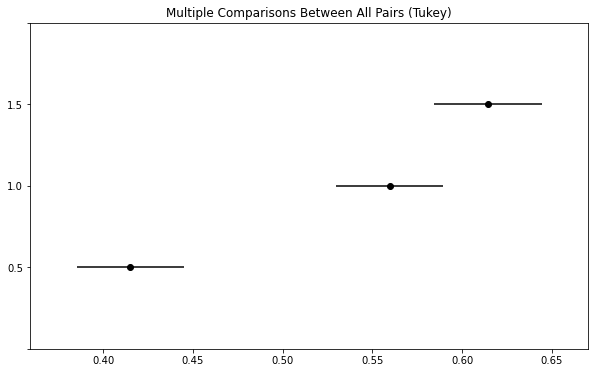

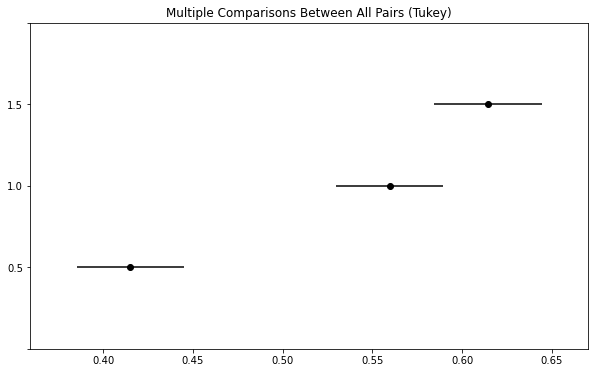

In [14]:
post_hoc_res.plot_simultaneous()

In [15]:
df_reward_anova = df[["Resolution", "Environment Type", "Light Intensity", "Reward"]]
df_reward_anova = df_reward_anova.rename(columns={"Environment Type": "Environment_Type", "Light Intensity": "Light_Intensity"})
df_reward_anova.head(100)

,Resolution,Environment_Type,Light_Intensity,Reward
0,28.0,simple,0.5,5186.6
1,28.0,simple,0.5,5166.6
2,28.0,simple,0.5,4717.6
3,28.0,simple,1.0,5323.4
4,28.0,simple,1.0,5281.4
5,28.0,simple,1.0,5269.0
6,28.0,simple,1.5,5295.8
7,28.0,simple,1.5,5447.4
8,28.0,simple,1.5,5370.6
9,28.0,complex,0.5,4481.4


In [16]:
model = ols("Reward ~ C(Resolution, Sum) + C(Environment_Type, Sum) + C(Light_Intensity, Sum) + C(Resolution, Sum)*C(Environment_Type, Sum)*C(Light_Intensity, Sum)", data=df_reward_anova).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,9.600475e+08,1.0,18302.418058,4.103726e-36
"C(Resolution, Sum)",5.286744e+05,1.0,10.078689,4.083056e-03
"C(Environment_Type, Sum)",2.696725e+05,1.0,5.141057,3.265429e-02
"C(Light_Intensity, Sum)",9.713769e+05,2.0,9.259201,1.046193e-03
"C(Resolution, Sum):C(Environment_Type, Sum)",3.545409e+05,1.0,6.758994,1.571129e-02
"C(Resolution, Sum):C(Light_Intensity, Sum)",4.905089e+04,2.0,0.467555,6.321199e-01
"C(Environment_Type, Sum):C(Light_Intensity, Sum)",3.042014e+04,2.0,0.289966,7.508736e-01
"C(Resolution, Sum):C(Environment_Type, Sum):C(Light_Intensity, Sum)",1.050727e+05,2.0,1.001557,3.821472e-01
Residual,1.258912e+06,24.0,NaN,NaN


In [17]:
model = ols("Reward ~ C(Resolution, Sum) + C(Environment_Type, Sum) + C(Light_Intensity, Sum) + C(Resolution, Sum):C(Environment_Type, Sum) + C(Resolution, Sum):C(Light_Intensity, Sum) + C(Environment_Type, Sum):C(Light_Intensity, Sum)", data=df_reward_anova).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,9.600475e+08,1.0,18300.226574,1.463082e-38
"C(Resolution, Sum)",5.286744e+05,1.0,10.077482,3.837478e-03
"C(Environment_Type, Sum)",2.696725e+05,1.0,5.140441,3.192140e-02
"C(Light_Intensity, Sum)",9.713769e+05,2.0,9.258092,9.202808e-04
"C(Resolution, Sum):C(Environment_Type, Sum)",3.545409e+05,1.0,6.758184,1.518145e-02
"C(Resolution, Sum):C(Light_Intensity, Sum)",4.905089e+04,2.0,0.467499,6.317325e-01
"C(Environment_Type, Sum):C(Light_Intensity, Sum)",3.042014e+04,2.0,0.289931,7.507028e-01
Residual,1.363985e+06,26.0,NaN,NaN


In [18]:
model = ols("Reward ~ C(Resolution, Sum) + C(Environment_Type, Sum) + C(Light_Intensity, Sum) + C(Resolution, Sum):C(Environment_Type, Sum)", data=df_reward_anova).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,9.600475e+08,1.0,19953.101428,6.411243e-44
"C(Resolution, Sum)",5.286744e+05,1.0,10.987679,2.404919e-03
"C(Environment_Type, Sum)",2.696725e+05,1.0,5.604725,2.455873e-02
"C(Light_Intensity, Sum)",9.713769e+05,2.0,10.094282,4.443725e-04
"C(Resolution, Sum):C(Environment_Type, Sum)",3.545409e+05,1.0,7.368583,1.089656e-02
Residual,1.443456e+06,30.0,NaN,NaN


In [19]:
comp = sm.stats.multicomp.MultiComparison(df_reward_anova["Reward"], df_reward_anova["Light_Intensity"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.5,1.0,265.4833,0.0671,-15.4539,546.4206,False
0.5,1.5,394.5833,0.0044,113.6461,675.5206,True
1.0,1.5,129.1,0.5053,-151.8372,410.0372,False
